# Report

## Imports

In [79]:
import numpy as np
import cv2 as cv

from IPython.display import clear_output
import matplotlib.pyplot as plt

## Preprocessing

In [ ]:
# download the data
! kaggle competitions download -c iapr24-coin-counter
! unzip iapr24-coin-counter.zip && rm iapr24-coin-counter.zip

# clear the output for cleaner notebook
clear_output()

## Hough Transform

In [80]:
img_path = 'train/1. neutral_bg/L1010277.JPG'

In [81]:
def resize_image(image, scale_percent):
    width = int(image.shape[1] * scale_percent / 100)
    height = int(image.shape[0] * scale_percent / 100)
    dim = (width, height)
    resized = cv.resize(image, dim, interpolation=cv.INTER_AREA)
    return resized

In [82]:
img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
img_resized = resize_image(img, 10)

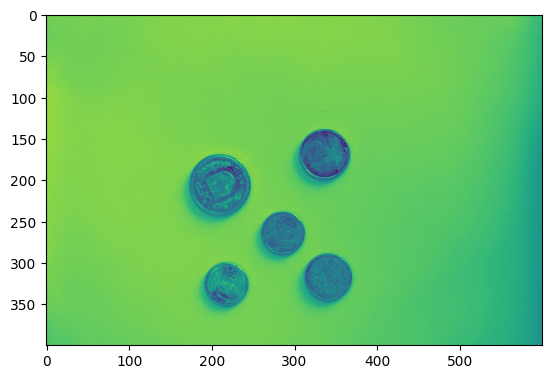

In [83]:
plt.imshow(img_resized)

In [86]:
img_blurred = cv.medianBlur(img_resized, 5)
cimg = cv.cvtColor(img_blurred, cv.COLOR_GRAY2BGR)

circles = cv.HoughCircles(img_blurred, cv.HOUGH_GRADIENT, 1, 20, param1=70, param2=20, minRadius=10, maxRadius=50)

In [87]:
circles

array([[[209.5, 207.5,  37. ],
        [336.5, 169.5,  30.3],
        [340.5, 318.5,  28.6],
        [286.5, 265.5,  26.8],
        [217.5, 326.5,  26.3]]], dtype=float32)

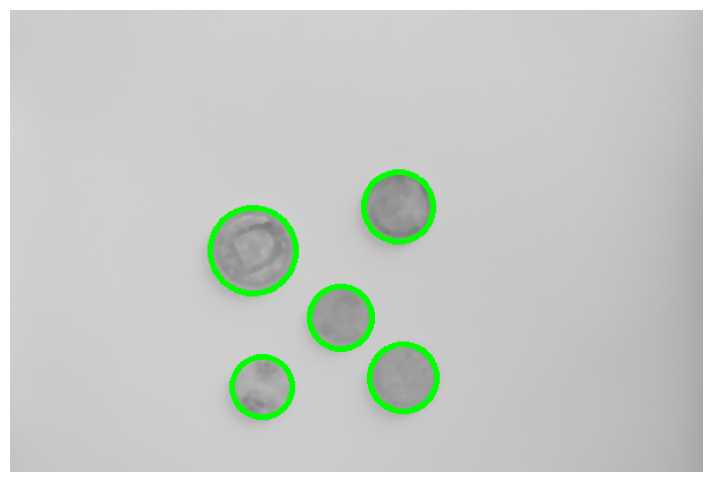

In [88]:
circles = np.uint16(np.around(circles))

for (x, y, r) in circles[0, :]:
        cv.circle(cimg, (x, y), r, (0, 255, 0), 4)

# Display the image
plt.figure(figsize=(10, 6))
plt.imshow(cimg)
plt.axis('off')  # Hide the axis
plt.show()